In [1]:
%matplotlib inline
from genetic_oscillator_benchmarking import *

## Properties

In [2]:
P = Atomic(var("x6") > 1)
P

Atomic(x6 > 1)

In [3]:
Q = Atomic(var("x4") < 11/2500); Q

Atomic(x4 < 0.0044)

In [4]:
I = RIF(3, 3.5)

## Concurrency

In [5]:
import concurrent.futures as fut

pool = fut.ProcessPoolExecutor(4)

thread_pool = fut.ThreadPoolExecutor(1000)

def restart_pool():
    global pool
    
    del pool
    pool = fut.ProcessPoolExecutor(4)

In [6]:
def benchmark_prop(prop, duration, **kwargs):
    agg_metric = instrumentation.AggregateMetric()
    tim, sig = test_monitoring(prop, duration,
                               instrumentor=agg_metric, **kwargs)
    return sig, tim, agg_metric

def schedule_test(prop, duration, **kwargs):
    return {
        'prop': prop,
        'duration': duration,
        'kwargs': kwargs,
        'future': pool.submit(
            benchmark_prop, prop, duration, **kwargs),
    }

from gi.repository import Notify
Notify.init("LBUC Benchmarking")

def notify_when_done(ress, task_description=None):
    fut.wait(futures(ress))
    
    if task_description is None:
        Notify.Notification.new("Benchmark run done!").show()
    else:
        Notify.Notification.new("Benchmark run done!",
                                task_description).show()

def futures(results):
    return [res['future'] for res in results]

def gen_results(n, *args, task_description=None, **kwargs):
    results = [
        schedule_test(*args, **kwargs)
            for _ in range(n)
    ]
    thread_pool.submit(notify_when_done, results, task_description)
    return results

<ipython-input-6-b0324e55b331>:16: PyGIWarning: Notify was imported without specifying a version first. Use gi.require_version('Notify', '0.7') before import to ensure that the right version gets loaded.
  from gi.repository import Notify


## Launch Runs

In [13]:
restart_pool()

In [7]:
num_runs = 5
duration = 1.5

In [8]:
warmup = gen_results(
    20,
    P | G(I, Q),
    duration,
    task_description='Warmup',
    use_masks=False,
    symbolic_composition=False,
) 

/usr/lib64/python3.8/multiprocessing/queues.py:116: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _ForkingPickler.loads(res)
/usr/lib64/python3.8/multiprocessing/queues.py:116: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _ForkingPickler.loads(res)


calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
ode in polynomial ring
crude_roots = False


/usr/lib64/python3.8/multiprocessing/queues.py:116: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _ForkingPickler.loads(res)
/usr/lib64/python3.8/multiprocessing/queues.py:116: DeprecationWarning: PY_SSIZE_T_CLEAN will be required for '#' formats
  return _ForkingPickler.loads(res)


calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6

domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[2.1472120863967742 .. 2.1472121000576672], 
 [2.1472387185179555 .. 2.1472387437406071], 
 [2.1472592556771363 .. 3.8670000000001097], 
 [3.8691087056176058 .. 3.8691088829119758], 
 [3.8691203925013053 .. 3.8691204914316449], 
 [3.8691320409959244 .. 3.8691323237696751], 
 [3.8691437267237600 .. 3.8691440089884406], 
 [3.8695557933617652 .. 3.8695558750450792], 
 [3.8695616167955071 .. 3.8695616636328647], 
 [3.8695674210099242 .. 3.8695675608879819], 
 [3.8695732424012270 .. 3.8695733848322700], 
 [3.8697669637477298 .. 3.8697670020933597], 
 [3.8697698682939734 .. 3.8697698897712725], 
 [3.8697727628435685 .. 3.8697728310911832], 
 [3.8697756656531452 .. 3.8697757358164747], 
 [3.8698693000028430 .. 3.8698693117229395], 
 [3.8698707532175902 .. 3.8698707657555876], 
 [3.8698722103836069 .. 3.8698722465003677], 
 [3.8698736614980706 .. 3.8698736885939918], 
 [3.8699203137968503 .. 3.8699203188976279], 
 [3.8699210390953093

 [3.8699538624342082 .. 3.8700000000001098]]
top-level root detection: 1 items in 45.41 seconds
roots = [[2.1472120863967742 .. 2.1472121000576672], [2.1472387185179555 .. 2.1472387437406071], [2.1472592556771363 .. 3.8670000000001097], [3.8691087056176058 .. 3.8691088829119758], [3.8691203925013053 .. 3.8691204914316449], [3.8691320409959244 .. 3.8691323237696751], [3.8691437267237600 .. 3.8691440089884406], [3.8695557933617652 .. 3.8695558750450792], [3.8695616167955071 .. 3.8695616636328647], [3.8695674210099242 .. 3.8695675608879819], [3.8695732424012270 .. 3.8695733848322700], [3.8697669637477298 .. 3.8697670020933597], [3.8697698682939734 .. 3.8697698897712725], [3.8697727628435685 .. 3.8697728310911832], [3.8697756656531452 .. 3.8697757358164747], [3.8698693000028430 .. 3.8698693117229395], [3.8698707532175902 .. 3.8698707657555876], [3.8698722103836069 .. 3.8698722465003677], [3.8698736614980706 .. 3.8698736885939918], [3.8699203137968503 .. 3.8699203188976279], [3.869921039095

C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
top-level root detection: 1 items in 51.75 seconds
roots = [[2.1472120863967742 .. 2.1472121000576672], [2.1472387185179555 .. 2.1472387437406071], [2.1472592556771363 .. 3.8670000000001097], [3.8691087056176058 .. 3.8691088829119758], [3.8691203925013053 .. 3.8691204914316449], [3.8691320409959244 .. 3.8691323237696751], [3.8691437267237600 .. 3.8691440089884406], [3.8695557933617652 .. 3.8695558750450792], [3.8695616167955071 .. 3.8695616636328647], [3.8695674210099242 .. 3.8695675608879819], [3.8695732424012270 .. 3.8695733848322700], [3.8697669637477298 .. 3.8697670020933597], [3.8697698682939734 .. 3.8697698897712725], [3.8697727628435685 .. 3.8697728310911832], [3.86977566

roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 7.30 seconds
roots = [[0.71099999999997254 .. 0.96600000000000086]]
domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[0.71099999999997254 .. 0.96600000000000086]]
seg_domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[0.71099999999997254 .. 0.96600000000000086]]
signal given bool roots: 1 items in 0.01 seconds
In G.signal
PolyObserver(-x4 + 0.0044000000000000003?, <flowstar.reachability.Reach object at 0x7f3e30735580>, -x2*x6 + 100*x4, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -x2*x6 + 100*x4
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
Computed 1668 flowpipes in 58.17438305000542 sec
PolyObserver(x6 - 1, <flowstar.reachability.Reach object at 0x7f3e30735580>, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, symbolic_co

ran "Monitoring Signal for x6 > 1 | G([3.0000000000000000 .. 3.5000000000000000], x4 < 0.0044)" 1 times in 51.431071043014526
Run done in 101.97621512413025 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7f3e30e01ec0>, 'use_masks': False, 'symbolic_composition': False}
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.1200000

domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[2.1472120863967742 .. 2.1472121000576672], 
 [2.1472387185179555 .. 2.1472387437406071], 
 [2.1472592556771363 .. 3.8670000000001097], 
 [3.8691087056176058 .. 3.8691088829119758], 
 [3.8691203925013053 .. 3.8691204914316449], 
 [3.8691320409959244 .. 3.8691323237696751], 
 [3.8691437267237600 .. 3.8691440089884406], 
 [3.8695557933617652 .. 3.8695558750450792], 
 [3.8695616167955071 .. 3.8695616636328647], 
 [3.8695674210099242 .. 3.8695675608879819], 
 [3.8695732424012270 .. 3.8695733848322700], 
 [3.8697669637477298 .. 3.8697670020933597], 
 [3.8697698682939734 .. 3.8697698897712725], 
 [3.8697727628435685 .. 3.8697728310911832], 
 [3.8697756656531452 .. 3.8697757358164747], 
 [3.8698693000028430 .. 3.8698693117229395], 
 [3.8698707532175902 .. 3.8698707657555876], 
 [3.8698722103836069 .. 3.8698722465003677], 
 [3.8698736614980706 .. 3.8698736885939918], 
 [3.8699203137968503 .. 3.8699203188976279], 
 [3.8699210390953093

 [3.8699538624342082 .. 3.8700000000001098]]
signal given bool roots: 1 items in 0.15 seconds
ran "Precomposing Contexts" 1 times in 3.504753112792969e-05
ran "restoring globals" 16 times in 0.0015168190002441406
ran "capturing globals [on exit]" 16 times in 0.0007660388946533203
ran "Running Flow*" 1 times in 51.3868350982666
ran "mask intersect check" 3336 times in 0.0062181949615478516
ran "tentative eval" 3248 times in 3.0261290073394775
ran "composing flowpipe" 902 times in 39.13461351394653
ran "whole domain eval" 875 times in 1.6088640689849854
ran "post retrieve" 660 times in 0.005072832107543945
ran "root detection" 660 times in 6.761514186859131
ran "root amalgamation" 660 times in 0.00162506103515625
ran "prepare in check" 31 times in 0.00020241737365722656
ran "check boolean [unguarded]" 31 times in 0.13381719589233398
ran "observer.check" 31 times in 0.1355738639831543
ran "Monitoring atomic x6 > 1" 1 times in 5.899401664733887
ran "Monitoring atomic x4 < 0.0044" 1 times i

domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[2.1472120863967742 .. 2.1472121000576672], 
 [2.1472387185179555 .. 2.1472387437406071], 
 [2.1472592556771363 .. 3.8670000000001097], 
 [3.8691087056176058 .. 3.8691088829119758], 
 [3.8691203925013053 .. 3.8691204914316449], 
 [3.8691320409959244 .. 3.8691323237696751], 
 [3.8691437267237600 .. 3.8691440089884406], 
 [3.8695557933617652 .. 3.8695558750450792], 
 [3.8695616167955071 .. 3.8695616636328647], 
 [3.8695674210099242 .. 3.8695675608879819], 
 [3.8695732424012270 .. 3.8695733848322700], 
 [3.8697669637477298 .. 3.8697670020933597], 
 [3.8697698682939734 .. 3.8697698897712725], 
 [3.8697727628435685 .. 3.8697728310911832], 
 [3.8697756656531452 .. 3.8697757358164747], 
 [3.8698693000028430 .. 3.8698693117229395], 
 [3.8698707532175902 .. 3.8698707657555876], 
 [3.8698722103836069 .. 3.8698722465003677], 
 [3.8698736614980706 .. 3.8698736885939918], 
 [3.8699203137968503 .. 3.8699203188976279], 
 [3.8699210390953093

 [3.8699538624342082 .. 3.8700000000001098]]
signal given bool roots: 1 items in 0.83 seconds
ran "Precomposing Contexts" 1 times in 4.0531158447265625e-05
ran "restoring globals" 16 times in 0.0015065670013427734
ran "capturing globals [on exit]" 16 times in 0.012425899505615234
ran "Running Flow*" 1 times in 51.73820900917053
ran "mask intersect check" 3336 times in 0.006464719772338867
ran "tentative eval" 3248 times in 3.2801036834716797
ran "composing flowpipe" 902 times in 47.67179846763611
ran "whole domain eval" 875 times in 1.8709557056427002
ran "post retrieve" 660 times in 0.005544900894165039
ran "root detection" 660 times in 7.490936994552612
ran "root amalgamation" 660 times in 0.0023148059844970703
ran "prepare in check" 31 times in 0.00020694732666015625
ran "check boolean [unguarded]" 31 times in 0.1119389533996582
ran "observer.check" 31 times in 0.11377382278442383
ran "Monitoring atomic x6 > 1" 1 times in 6.234398365020752
ran "Monitoring atomic x4 < 0.0044" 1 times

C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
top-level root detection: 1 items in 45.51 seconds
roots = [[2.1472120863967742 .. 2.1472121000576672], [2.1472387185179555 .. 2.1472387437406071], [2.1472592556771363 .. 3.8670000000001097], [3.8691087056176058 .. 3.8691088829119758], [3.8691203925013053 .. 3.8691204914316449], [3.8691320409959244 .. 3.8691323237696751], [3.8691437267237600 .. 3.8691440089884406], [3.8695557933617652 .. 3.8695558750450792], [3.8695616167955071 .. 3.8695616636328647], [3.8695674210099242 .. 3.8695675608879819], [3.8695732424012270 .. 3.8695733848322700], [3.8697669637477298 .. 3.8697670020933597], [3.8697698682939734 .. 3.8697698897712725], [3.8697727628435685 .. 3.8697728310911832], [3.86977566

symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
PolyObserver(x6 - 1, <flowstar.reachability.Reach object at 0x7f3e300a92e0>, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 6.29 seconds
roots = [[0.71099999999997254 .. 0.96600000000000086]]
domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[0.71099999999997254 .. 0.96600000000000086]]
seg_domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[0.71099999999997254 .. 0.96600000000000086]]
signal given bool roots: 1 items in 0.01 seconds
In G.signal
PolyObserver(-x4 + 0.0044000000000

ran "Monitoring Signal for x6 > 1 | G([3.0000000000000000 .. 3.5000000000000000], x4 < 0.0044)" 1 times in 53.61810088157654
Run done in 104.24495267868042 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7f3e3072c980>, 'use_masks': False, 'symbolic_composition': False}
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000

domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[2.1472120863967742 .. 2.1472121000576672], 
 [2.1472387185179555 .. 2.1472387437406071], 
 [2.1472592556771363 .. 3.8670000000001097], 
 [3.8691087056176058 .. 3.8691088829119758], 
 [3.8691203925013053 .. 3.8691204914316449], 
 [3.8691320409959244 .. 3.8691323237696751], 
 [3.8691437267237600 .. 3.8691440089884406], 
 [3.8695557933617652 .. 3.8695558750450792], 
 [3.8695616167955071 .. 3.8695616636328647], 
 [3.8695674210099242 .. 3.8695675608879819], 
 [3.8695732424012270 .. 3.8695733848322700], 
 [3.8697669637477298 .. 3.8697670020933597], 
 [3.8697698682939734 .. 3.8697698897712725], 
 [3.8697727628435685 .. 3.8697728310911832], 
 [3.8697756656531452 .. 3.8697757358164747], 
 [3.8698693000028430 .. 3.8698693117229395], 
 [3.8698707532175902 .. 3.8698707657555876], 
 [3.8698722103836069 .. 3.8698722465003677], 
 [3.8698736614980706 .. 3.8698736885939918], 
 [3.8699203137968503 .. 3.8699203188976279], 
 [3.8699210390953093

 [3.8699538624342082 .. 3.8700000000001098]]
signal given bool roots: 1 items in 0.14 seconds
ran "Precomposing Contexts" 1 times in 4.4345855712890625e-05
ran "restoring globals" 16 times in 0.0020225048065185547
ran "capturing globals [on exit]" 16 times in 0.0010254383087158203
ran "Running Flow*" 1 times in 74.3192765712738
ran "mask intersect check" 3336 times in 0.00641632080078125
ran "tentative eval" 3248 times in 3.3122708797454834
ran "composing flowpipe" 902 times in 39.75863528251648
ran "whole domain eval" 875 times in 1.7016468048095703
ran "post retrieve" 660 times in 0.005644798278808594
ran "root detection" 660 times in 6.458167314529419
ran "root amalgamation" 660 times in 0.0018203258514404297
ran "prepare in check" 31 times in 0.00020551681518554688
ran "check boolean [unguarded]" 31 times in 0.12732672691345215
ran "observer.check" 31 times in 0.1292874813079834
ran "Monitoring atomic x6 > 1" 1 times in 6.2385406494140625
ran "Monitoring atomic x4 < 0.0044" 1 times

domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[2.1472120863967742 .. 2.1472121000576672], 
 [2.1472387185179555 .. 2.1472387437406071], 
 [2.1472592556771363 .. 3.8670000000001097], 
 [3.8691087056176058 .. 3.8691088829119758], 
 [3.8691203925013053 .. 3.8691204914316449], 
 [3.8691320409959244 .. 3.8691323237696751], 
 [3.8691437267237600 .. 3.8691440089884406], 
 [3.8695557933617652 .. 3.8695558750450792], 
 [3.8695616167955071 .. 3.8695616636328647], 
 [3.8695674210099242 .. 3.8695675608879819], 
 [3.8695732424012270 .. 3.8695733848322700], 
 [3.8697669637477298 .. 3.8697670020933597], 
 [3.8697698682939734 .. 3.8697698897712725], 
 [3.8697727628435685 .. 3.8697728310911832], 
 [3.8697756656531452 .. 3.8697757358164747], 
 [3.8698693000028430 .. 3.8698693117229395], 
 [3.8698707532175902 .. 3.8698707657555876], 
 [3.8698722103836069 .. 3.8698722465003677], 
 [3.8698736614980706 .. 3.8698736885939918], 
 [3.8699203137968503 .. 3.8699203188976279], 
 [3.8699210390953093

 [3.8699538624342082 .. 3.8700000000001098]]
signal given bool roots: 1 items in 0.16 seconds
ran "Precomposing Contexts" 1 times in 5.364418029785156e-05
ran "restoring globals" 16 times in 0.0013663768768310547
ran "capturing globals [on exit]" 16 times in 0.0007305145263671875
ran "Running Flow*" 1 times in 52.646082639694214
ran "mask intersect check" 3336 times in 0.006453275680541992
ran "tentative eval" 3248 times in 3.130713939666748
ran "composing flowpipe" 902 times in 39.21751093864441
ran "whole domain eval" 875 times in 1.604954481124878
ran "post retrieve" 660 times in 0.005357980728149414
ran "root detection" 660 times in 6.761320114135742
ran "root amalgamation" 660 times in 0.0019192695617675781
ran "prepare in check" 31 times in 0.00022220611572265625
ran "check boolean [unguarded]" 31 times in 0.1424248218536377
ran "observer.check" 31 times in 0.14466047286987305
ran "Monitoring atomic x6 > 1" 1 times in 5.8632752895355225
ran "Monitoring atomic x4 < 0.0044" 1 times

C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
top-level root detection: 1 items in 44.91 seconds
roots = [[2.1472120863967742 .. 2.1472121000576672], [2.1472387185179555 .. 2.1472387437406071], [2.1472592556771363 .. 3.8670000000001097], [3.8691087056176058 .. 3.8691088829119758], [3.8691203925013053 .. 3.8691204914316449], [3.8691320409959244 .. 3.8691323237696751], [3.8691437267237600 .. 3.8691440089884406], [3.8695557933617652 .. 3.8695558750450792], [3.8695616167955071 .. 3.8695616636328647], [3.8695674210099242 .. 3.8695675608879819], [3.8695732424012270 .. 3.8695733848322700], [3.8697669637477298 .. 3.8697670020933597], [3.8697698682939734 .. 3.8697698897712725], [3.8697727628435685 .. 3.8697728310911832], [3.86977566

roots = [[0.71099999999997254 .. 0.96600000000000086]]
signal given bool roots: 1 items in 0.01 seconds
In G.signal
PolyObserver(-x4 + 0.0044000000000000003?, <flowstar.reachability.Reach object at 0x7f3e30735ba0>, -x2*x6 + 100*x4, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -x2*x6 + 100*x4
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
PolyObserver(-x4 + 0.0044000000000000003?, <flowstar.reachability.Reach object at 0x7f3e30735ba0>, -x2*x6 + 100*x4, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -x2*x6 + 100*x4
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
Computed 1668 flowpipes in 54.80268445701222 sec
PolyObserver(x6 - 1, <flowstar.reachability.Reach object at 0x7f3e30735580>, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*

ran "Monitoring Signal for x6 > 1 | G([3.0000000000000000 .. 3.5000000000000000], x4 < 0.0044)" 1 times in 51.27003026008606
Run done in 101.74905180931091 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7f3e3073f040>, 'use_masks': False, 'symbolic_composition': False}
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000

domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[2.1472120863967742 .. 2.1472121000576672], 
 [2.1472387185179555 .. 2.1472387437406071], 
 [2.1472592556771363 .. 3.8670000000001097], 
 [3.8691087056176058 .. 3.8691088829119758], 
 [3.8691203925013053 .. 3.8691204914316449], 
 [3.8691320409959244 .. 3.8691323237696751], 
 [3.8691437267237600 .. 3.8691440089884406], 
 [3.8695557933617652 .. 3.8695558750450792], 
 [3.8695616167955071 .. 3.8695616636328647], 
 [3.8695674210099242 .. 3.8695675608879819], 
 [3.8695732424012270 .. 3.8695733848322700], 
 [3.8697669637477298 .. 3.8697670020933597], 
 [3.8697698682939734 .. 3.8697698897712725], 
 [3.8697727628435685 .. 3.8697728310911832], 
 [3.8697756656531452 .. 3.8697757358164747], 
 [3.8698693000028430 .. 3.8698693117229395], 
 [3.8698707532175902 .. 3.8698707657555876], 
 [3.8698722103836069 .. 3.8698722465003677], 
 [3.8698736614980706 .. 3.8698736885939918], 
 [3.8699203137968503 .. 3.8699203188976279], 
 [3.8699210390953093

 [3.8699538624342082 .. 3.8700000000001098]]
signal given bool roots: 1 items in 0.12 seconds
ran "Precomposing Contexts" 1 times in 5.793571472167969e-05
ran "restoring globals" 16 times in 0.0012791156768798828
ran "capturing globals [on exit]" 16 times in 0.0006234645843505859
ran "Running Flow*" 1 times in 54.094831466674805
ran "mask intersect check" 3336 times in 0.006887912750244141
ran "tentative eval" 3248 times in 3.4254097938537598
ran "composing flowpipe" 902 times in 42.949390172958374
ran "whole domain eval" 875 times in 1.786726951599121
ran "post retrieve" 660 times in 0.005269765853881836
ran "root detection" 660 times in 7.041346788406372
ran "root amalgamation" 660 times in 0.0017075538635253906
ran "prepare in check" 31 times in 0.00019359588623046875
ran "check boolean [unguarded]" 31 times in 0.10782074928283691
ran "observer.check" 31 times in 0.10935497283935547
ran "Monitoring atomic x6 > 1" 1 times in 6.27385139465332
ran "Monitoring atomic x4 < 0.0044" 1 time

 [3.8699538624342082 .. 3.8700000000001098]]
signal given bool roots: 1 items in 0.12 seconds
ran "Precomposing Contexts" 1 times in 3.886222839355469e-05
ran "restoring globals" 16 times in 0.0012676715850830078
ran "capturing globals [on exit]" 16 times in 0.0006368160247802734
ran "Running Flow*" 1 times in 58.21938633918762
ran "mask intersect check" 3336 times in 0.008912086486816406
ran "tentative eval" 933 times in 0.8718185424804688
ran "composing flowpipe" 219 times in 9.108217239379883
ran "whole domain eval" 194 times in 0.35201144218444824
ran "post retrieve" 139 times in 0.0012357234954833984
ran "root detection" 139 times in 4.162353515625
ran "root amalgamation" 139 times in 0.000324249267578125
ran "prepare in check" 28 times in 0.00016379356384277344
ran "check boolean [unguarded]" 28 times in 0.1023709774017334
ran "observer.check" 28 times in 0.10379314422607422
ran "Monitoring atomic x6 > 1" 1 times in 4.738144636154175
ran "Monitoring atomic x4 < 0.0044" 1 times in

ran "observer.check" 28 times in 0.1454784870147705
ran "Monitoring atomic x6 > 1" 1 times in 4.804490089416504
ran "Monitoring atomic x4 < 0.0044" 1 times in 11.094701766967773
ran "Monitoring Signal for x6 > 1 | G([3.0000000000000000 .. 3.5000000000000000], x4 < 0.0044)" 1 times in 15.987273454666138
Run done in 66.21575379371643 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7f3e300a2fc0>, 'use_masks': True, 'symbolic_composition': False}
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called

run within tmv args
integrationScheme = 7
top-level root detection: 1 items in 45.79 seconds
roots = [[2.1472120863967742 .. 2.1472121000576672], [2.1472387185179555 .. 2.1472387437406071], [2.1472592556771363 .. 3.8670000000001097], [3.8691087056176058 .. 3.8691088829119758], [3.8691203925013053 .. 3.8691204914316449], [3.8691320409959244 .. 3.8691323237696751], [3.8691437267237600 .. 3.8691440089884406], [3.8695557933617652 .. 3.8695558750450792], [3.8695616167955071 .. 3.8695616636328647], [3.8695674210099242 .. 3.8695675608879819], [3.8695732424012270 .. 3.8695733848322700], [3.8697669637477298 .. 3.8697670020933597], [3.8697698682939734 .. 3.8697698897712725], [3.8697727628435685 .. 3.8697728310911832], [3.8697756656531452 .. 3.8697757358164747], [3.8698693000028430 .. 3.8698693117229395], [3.8698707532175902 .. 3.8698707657555876], [3.8698722103836069 .. 3.8698722465003677], [3.8698736614980706 .. 3.8698736885939918], [3.8699203137968503 .. 3.8699203188976279], [3.869921039095309

domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[3.7109999999992688 .. 3.8670000000001097], 
 [3.8691087056176058 .. 3.8691088829119758], 
 [3.8691203925013053 .. 3.8691204914316449], 
 [3.8691320409959244 .. 3.8691323237696751], 
 [3.8691437267237600 .. 3.8691440089884406], 
 [3.8695557933617652 .. 3.8695558750450792], 
 [3.8695616167955071 .. 3.8695616636328647], 
 [3.8695674210099242 .. 3.8695675608879819], 
 [3.8695732424012270 .. 3.8695733848322700], 
 [3.8697669637477298 .. 3.8697670020933597], 
 [3.8697698682939734 .. 3.8697698897712725], 
 [3.8697727628435685 .. 3.8697728310911832], 
 [3.8697756656531452 .. 3.8697757358164747], 
 [3.8698693000028430 .. 3.8698693117229395], 
 [3.8698707532175902 .. 3.8698707657555876], 
 [3.8698722103836069 .. 3.8698722465003677], 
 [3.8698736614980706 .. 3.8698736885939918], 
 [3.8699203137968503 .. 3.8699203188976279], 
 [3.8699210390953093 .. 3.8699210446355031], 
 [3.8699217663540705 .. 3.8699217837003737], 
 [3.8699224914019594

domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[3.7109999999992688 .. 3.8670000000001097], 
 [3.8691087056176058 .. 3.8691088829119758], 
 [3.8691203925013053 .. 3.8691204914316449], 
 [3.8691320409959244 .. 3.8691323237696751], 
 [3.8691437267237600 .. 3.8691440089884406], 
 [3.8695557933617652 .. 3.8695558750450792], 
 [3.8695616167955071 .. 3.8695616636328647], 
 [3.8695674210099242 .. 3.8695675608879819], 
 [3.8695732424012270 .. 3.8695733848322700], 
 [3.8697669637477298 .. 3.8697670020933597], 
 [3.8697698682939734 .. 3.8697698897712725], 
 [3.8697727628435685 .. 3.8697728310911832], 
 [3.8697756656531452 .. 3.8697757358164747], 
 [3.8698693000028430 .. 3.8698693117229395], 
 [3.8698707532175902 .. 3.8698707657555876], 
 [3.8698722103836069 .. 3.8698722465003677], 
 [3.8698736614980706 .. 3.8698736885939918], 
 [3.8699203137968503 .. 3.8699203188976279], 
 [3.8699210390953093 .. 3.8699210446355031], 
 [3.8699217663540705 .. 3.8699217837003737], 
 [3.8699224914019594

 [3.8699538624342082 .. 3.8700000000001098]]
signal given bool roots: 1 items in 0.18 seconds
PolyObserver(x6 - 1, <flowstar.reachability.Reach object at 0x7f3e30735ac0>, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 7.16 seconds
roots = [[0.71099999999997254 .. 0.96600000000000086]]
domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[0.71099999999997254 .. 0.96600000000000086]]
seg_domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[0.71099999999997254 .. 0.96600000000000086]]
signal given bool roots: 1 items in 0.01 seconds
ran "Precomposing Contexts" 1 times in 0.0001430511474609375
ran "restoring globals" 16

seg_domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[0.71099999999997254 .. 0.96600000000000086]]
signal given bool roots: 1 items in 0.01 seconds
ran "Precomposing Contexts" 1 times in 4.00543212890625e-05
ran "restoring globals" 16 times in 0.001455545425415039
ran "capturing globals [on exit]" 16 times in 0.0006966590881347656
ran "Running Flow*" 1 times in 52.2808518409729
ran "mask intersect check" 3336 times in 0.007018089294433594
ran "tentative eval" 2637 times in 3.0139777660369873
ran "composing flowpipe" 1513 times in 47.92362976074219
ran "whole domain eval" 1486 times in 3.370732307434082
ran "post retrieve" 660 times in 0.0056781768798828125
ran "root detection" 660 times in 7.647650718688965
ran "root amalgamation" 660 times in 0.0023941993713378906
ran "prepare in check" 31 times in 0.00018858909606933594
ran "check boolean [unguarded]" 31 times in 0.11757612228393555
ran "observer.check" 31 times in 0.1192007064819336
ran "Monitoring atomic x4 < 0.0044" 1 

Run done in 109.91265630722046 sec
options: {'instrumentor': <flowstar.instrumentation.AggregateMetric object at 0x7f3fc0b467c0>, 'use_masks': False, 'symbolic_composition': False}
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.620000

C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
assigning system with dimension 9
resulting system has dimension 9
run within tmv args
integrationScheme = 7
Computed 1668 flowpipes in 55.71468005901261 sec
In G.signal
PolyObserver(-x4 + 0.0044000000000000003?, <flowstar.reachability.Reach object at 0x7f3e30735d60>, -x2*x6 + 100*x4, symbolic_composition=False, tentative_unpreconditioning=True, mask=Mask([0.0000000000000000 .. 8.5020000000000007], [[3.0000000000000000 .. 5.0020000000000007]]))
fprime = -x2*x6 + 100*x4
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 24.19 seconds
roots = [[2.9999999999995070 .. 3.8670000

 [3.8699538624342082 .. 3.8700000000001098]]
signal given bool roots: 1 items in 0.12 seconds
PolyObserver(x6 - 1, <flowstar.reachability.Reach object at 0x7f3e30735d60>, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 5.62 seconds
roots = [[0.71099999999997254 .. 0.96600000000000086]]
domain = [0.0000000000000000 .. 5.0020000000000007]
roots = [[0.71099999999997254 .. 0.96600000000000086]]
seg_domain = [0.0000000000000000 .. 1.5020000000000007]
roots = [[0.71099999999997254 .. 0.96600000000000086]]
signal given bool roots: 1 items in 0.01 seconds
ran "Precomposing Contexts" 1 times in 6.341934204101562e-05
ran "restoring globals" 16

 [3.8699538624342082 .. 3.8700000000001098]]
seg_domain = [3.0000000000000000 .. 5.0020000000000007]
roots = [[2.9999999999995070 .. 3.8670000000001097], 
 [3.8691087056176058 .. 3.8691088829119758], 
 [3.8691203925013053 .. 3.8691204914316449], 
 [3.8691320409959244 .. 3.8691323237696751], 
 [3.8691437267237600 .. 3.8691440089884406], 
 [3.8695557933617652 .. 3.8695558750450792], 
 [3.8695616167955071 .. 3.8695616636328647], 
 [3.8695674210099242 .. 3.8695675608879819], 
 [3.8695732424012270 .. 3.8695733848322700], 
 [3.8697669637477298 .. 3.8697670020933597], 
 [3.8697698682939734 .. 3.8697698897712725], 
 [3.8697727628435685 .. 3.8697728310911832], 
 [3.8697756656531452 .. 3.8697757358164747], 
 [3.8698693000028430 .. 3.8698693117229395], 
 [3.8698707532175902 .. 3.8698707657555876], 
 [3.8698722103836069 .. 3.8698722465003677], 
 [3.8698736614980706 .. 3.8698736885939918], 
 [3.8699203137968503 .. 3.8699203188976279], 
 [3.8699210390953093 .. 3.8699210446355031], 
 [3.8699217663540

ran "restoring globals" 16 times in 0.001729726791381836
ran "capturing globals [on exit]" 16 times in 0.0008428096771240234
ran "Running Flow*" 1 times in 59.434040784835815
ran "mask intersect check" 3336 times in 0.009760618209838867
ran "tentative eval" 1170 times in 1.0859644412994385
ran "composing flowpipe" 456 times in 21.25175428390503
ran "whole domain eval" 431 times in 0.7883880138397217
ran "post retrieve" 376 times in 0.003237485885620117
ran "root detection" 376 times in 4.75014328956604
ran "root amalgamation" 376 times in 0.0010693073272705078
ran "prepare in check" 28 times in 0.00016736984252929688
ran "check boolean [unguarded]" 28 times in 0.09662222862243652
ran "observer.check" 28 times in 0.09798669815063477
ran "Monitoring atomic x4 < 0.0044" 1 times in 23.523221254348755
ran "Monitoring atomic x6 > 1" 1 times in 4.5595738887786865
ran "Monitoring Signal for G([3.0000000000000000 .. 3.5000000000000000], x4 < 0.0044) & x6 > 1" 1 times in 28.172571182250977
Run d

 [3.8699538624342082 .. 3.8700000000001098]]
seg_domain = [3.0000000000000000 .. 5.0020000000000007]
roots = [[2.9999999999995070 .. 3.8670000000001097], 
 [3.8691087056176058 .. 3.8691088829119758], 
 [3.8691203925013053 .. 3.8691204914316449], 
 [3.8691320409959244 .. 3.8691323237696751], 
 [3.8691437267237600 .. 3.8691440089884406], 
 [3.8695557933617652 .. 3.8695558750450792], 
 [3.8695616167955071 .. 3.8695616636328647], 
 [3.8695674210099242 .. 3.8695675608879819], 
 [3.8695732424012270 .. 3.8695733848322700], 
 [3.8697669637477298 .. 3.8697670020933597], 
 [3.8697698682939734 .. 3.8697698897712725], 
 [3.8697727628435685 .. 3.8697728310911832], 
 [3.8697756656531452 .. 3.8697757358164747], 
 [3.8698693000028430 .. 3.8698693117229395], 
 [3.8698707532175902 .. 3.8698707657555876], 
 [3.8698722103836069 .. 3.8698722465003677], 
 [3.8698736614980706 .. 3.8698736885939918], 
 [3.8699203137968503 .. 3.8699203188976279], 
 [3.8699210390953093 .. 3.8699210446355031], 
 [3.8699217663540

In [9]:
results_unmasked = gen_results(
    num_runs,
    P | G(I, Q),
    duration,
    task_description='Unmasked P | G(Q)',
    use_masks=False,
    symbolic_composition=False,
)

In [10]:
results_masked = gen_results(
    num_runs,
    P | G(I, Q),
    duration,
    task_description='Masked P | G(Q)',
    use_masks=True,
    symbolic_composition=False,
)

In [11]:
results_unmasked_reversed = gen_results(
    num_runs,
    G(I, Q) | P,
    duration,
    task_description='Unmasked G(Q) | P',
    use_masks=False,
    symbolic_composition=False,
)

In [12]:
results_masked_reversed = gen_results(
    num_runs,
    G(I, Q) & P,
    duration,
    task_description='Masked F(Q) & P',
    use_masks=True,
    symbolic_composition=False,
)

In [15]:
results_unmasked[0]['future'].result()[0]

Signal([0.0000000000000000 .. 1.5000000000000000], [([0.0000000000000000 .. 1.5000000000000000], True)], mask=None)

# Analysis

In [14]:
import pandas as pd

In [15]:
def total_time_for_key(inst, ks):
    if isinstance(ks, str):
        ks = [ks]

    return sum(inst.total_time(k)
               for k in ks)


def total_times(results, keys, keys_short=None):
    ress = [
        f.result() for f in futures(results)
    ]
    if keys_short is None:
        keys_short = keys
    data = pd.DataFrame({
        short_key: [total_time_for_key(r[2], key) for r in ress]
        for short_key, key in zip(keys_short, keys)
    })
    data.insert(len(keys), 'Total',
                [r[1] for r in ress])
    return data

In [16]:
results_unmasked[0]['future'].result()[2].events

['Precomposing Contexts',
 'restoring globals',
 'capturing globals [on exit]',
 'Running Flow*',
 'mask intersect check',
 'tentative eval',
 'composing flowpipe',
 'whole domain eval',
 'post retrieve',
 'root detection',
 'root amalgamation',
 'prepare in check',
 'check boolean [unguarded]',
 'observer.check',
 'Monitoring atomic x6 > 1',
 'Monitoring atomic x4 < 0.0044',
 'Monitoring Signal for x6 > 1 | G([3.0000000000000000 .. 3.5000000000000000], x4 < 0.0044)']

In [17]:
cols_full = [
    'Running Flow*',
    f'Monitoring atomic {P}',
    f'Monitoring atomic {Q}',
    [
        f'Monitoring Signal for {P | G(I, Q)}',
        f'Monitoring Signal for {G(I, Q) | P}',
    ],
    'tentative eval',
    'root detection',
    'composing flowpipe',
]
cols_short = [
    'Flow*', 'P', 'Q', 'P | G(Q)',
    'tentative eval',
    'root detection',
    'composing flowpipe',
]

## Raw results

In [18]:
times_unmasked = total_times(
    results_unmasked,
    cols_full,
    cols_short,
)
times_unmasked

,Flow*,P,Q,P | G(Q),tentative eval,root detection,composing flowpipe,Total
0,50.330738,5.875899,45.287171,51.270030,3.064339,6.845308,39.375204,101.749052
1,50.141245,5.786377,45.711004,51.616390,3.120807,6.773370,39.670529,101.893558
2,54.802669,6.470760,45.583752,52.156671,3.443972,6.451776,40.226485,107.150877
3,54.094831,6.273851,49.195095,55.570922,3.425410,7.041347,42.949390,109.820681
4,50.651787,6.021962,45.988416,52.118055,3.169206,6.549341,40.313135,102.929703


In [19]:
times_unmasked['Flow*'].std()

2.2529018749628587

In [20]:
times_masked = total_times(
    results_masked,
    cols_full,
    cols_short,
)
times_masked

,Flow*,P,Q,P | G(Q),tentative eval,root detection,composing flowpipe,Total
0,58.219386,4.738145,9.940509,14.768779,0.871819,4.162354,9.108217,73.130631
1,50.082445,4.804490,11.094702,15.987273,0.873691,5.218515,9.217725,66.215754
2,55.583667,4.884628,10.282435,15.270587,0.969579,4.002507,9.587391,71.012030
3,51.701414,4.720000,10.298934,15.106208,0.865319,3.998801,9.572853,66.957090
4,56.405541,5.014453,10.015801,15.130136,0.954698,4.208276,9.310764,71.688380


In [21]:
times_masked['Flow*'].std()

3.3887538809328324

## Comparison

In [22]:
series = ['masked', 'unmasked',
          'masked_reversed', 'unmasked_reversed']
# total_timess = {
#    s: pd.load_csv(f'data/analysis3_raw_{s}.csv')
#    for s in series 
# }
total_timess = {
    s: total_times(eval(f'results_{s}'), cols_full, cols_short)
    for s in series 
}

In [23]:
for s, d in total_timess.items():
    d.to_csv(f'data/analysis3_no_symbolic_raw_{s}.csv')

In [24]:
comparison = pd.DataFrame({
    s: total_times.mean()
    for s, total_times in total_timess.items()
})

In [25]:
comparison

,masked,unmasked,masked_reversed,unmasked_reversed
Flow*,54.398491,52.004254,54.039158,51.501758
P,4.832343,6.085770,5.338149,7.329909
Q,10.326476,46.353088,23.904099,47.748764
P | G(Q),15.252597,52.546414,0.000000,55.175287
tentative eval,0.907021,3.244747,1.156164,2.669989
root detection,4.318091,6.732228,4.829107,7.106587
composing flowpipe,9.359390,40.506949,21.244990,41.998541
Total,69.800777,104.708774,83.750193,106.818196


In [26]:
comparison2 = comparison.loc[['P', 'Q'],:].transpose()
comparison2

,P,Q
masked,4.832343,10.326476
unmasked,6.085770,46.353088
masked_reversed,5.338149,23.904099
unmasked_reversed,7.329909,47.748764


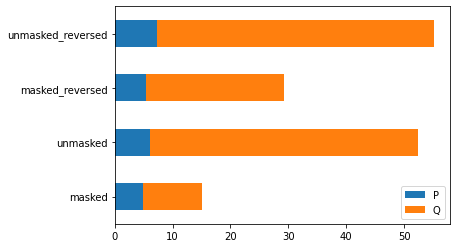

In [27]:
comparison2.plot(kind='barh', stacked=True)

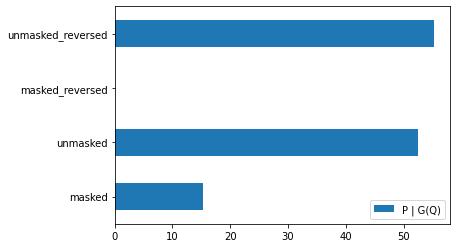

In [28]:
comparison3 = comparison.loc[['P | G(Q)'],:].transpose()
comparison3.plot(kind='barh')

In [85]:
restart_pool()